In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/데사프/data')

In [3]:
os.listdir()

['data_2019.csv', 'data_2020.csv', 'data_2021.csv']

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [4]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from matplotlib import font_manager, rc
from matplotlib import rcParams

# 1. 산림청에서 데이터 불러오기

In [ ]:
 # xmltodict : Python json 형태로 XML 파싱하는 라이브러리
!pip install xmltodict 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from urllib.request import urlopen
from urllib.parse import urlencode, unquote, quote_plus
import urllib
import requests
import pandas as pd
import xmltodict
import json
from datetime import datetime as dt
import requests

data=[]
for i in range(2011, 2024):
    key='HtO6O7%2BQUn9H6uufh35VfnYY8Gwp4XrWorsJHMIv95sXQnzCeGGEdhrWvmIT%2FS3518IGw%2B0b4zLeSCdmQgm%2BTg%3D%3D'
    url=f'http://apis.data.go.kr/1400000/forestStusService/getfirestatsservice?serviceKey={key}&'
    queryParams =urlencode({quote_plus('pageNo') : '1',quote_plus('numOfRows') : '9999',
                            quote_plus('searchStDt') : f'{i}0101',quote_plus('searchEdDt') : f'{i}1231'})

    url2=url+queryParams
    response = urlopen(url2) 
    results = response.read().decode("utf-8")
    results_to_json = xmltodict.parse(results)
    d = json.loads(json.dumps(results_to_json))
    data.extend(d['response']['body']['items']['item'])
    
df=pd.DataFrame(data)
si_do={'강원':'Gangwon-do','경기':'Gyeonggi-do', '경남':'Gyeongsangnam-do','경북':'Gyeongsangbuk-do',
       '광주':'Gwangju','대구':'Daegu','대전':'Daejeon','부산':'Busan',
       '서울':'Seoul','세종':'Sejongsi','울산':'Ulsan','인천':'Incheon',
       '전남':'Jeollanam-do','전북':'Jeollabuk-do','제주':'Jeju-do','충남':'Chungcheongnam-do',
       '충북':'Chungcheongbuk-do'}
df['eng_region']=df['locsi'].apply(lambda x: si_do[x])

# 변수 타입에 따른 데이터 설명


1. 피해면적합계 :	damagearea
2. 진화종료 일 :	endday
3. 진화종료 월 :	endmonth	
4. 진화종료 일시	: endtime	
5. 진화종료 연도 : endyear	
6. 발생원인	: firecause	
7. 발생장소_지번 :	locbunji	
8. 발생장소_동리 :	locdong	
9. 발생장소_시군구 :	locgungu
10. 발생장소_읍면 :	locmenu	
11. 발생장소_시도 :	locsi	
12. 발생일 :	startday
13. 발생요일 :	startdayofweek	
14. 발생월 :	startmonth
15. 발생시간 :	starttime	
16. 발생연도 :	startyear		

In [ ]:
df.head()

,damagearea,endday,endmonth,endtime,endyear,firecause,locbunji,locdong,locgungu,locmenu,locsi,startday,startdayofweek,startmonth,starttime,startyear,eng_region
0,0.1,28,12,08:30:00,2011,입산자실화,산202-2,장전평,홍천,홍천,강원,28,수요일,12,03:20:00,2011,Gangwon-do
1,0.5,24,12,16:30:00,2011,쓰레기소각,산14-1,무계,청송,현서,경북,24,토요일,12,14:30:00,2011,Gyeongsangbuk-do
2,0.01,22,12,18:20:00,2011,입산자실화,산52,원,산청,시천,경남,22,목요일,12,17:15:00,2011,Gyeongsangnam-do
3,0.2,09,12,15:00:00,2011,기타,산27,용수,기장,정관,부산,09,금요일,12,14:11:00,2011,Busan
4,0.3,29,11,22:30:00,2011,담뱃불실화,산4-1,거포,옥천,청성,충북,29,화요일,11,20:10:00,2011,Chungcheongbuk-do


In [ ]:
df['locbunji']

0        산202-2
1         산14-1
2           산52
3           산27
4          산4-1
          ...  
11927       산60
11928    857-20
11929       산44
11930     296-8
11931     산56-4
Name: locbunji, Length: 11932, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11932 entries, 0 to 11931
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   damagearea      11932 non-null  object
 1   endday          11932 non-null  object
 2   endmonth        11932 non-null  object
 3   endtime         11932 non-null  object
 4   endyear         11932 non-null  object
 5   firecause       11932 non-null  object
 6   locbunji        11923 non-null  object
 7   locdong         10446 non-null  object
 8   locgungu        11913 non-null  object
 9   locmenu         11158 non-null  object
 10  locsi           11932 non-null  object
 11  startday        11932 non-null  object
 12  startdayofweek  11932 non-null  object
 13  startmonth      11932 non-null  object
 14  starttime       11932 non-null  object
 15  startyear       11932 non-null  object
 16  eng_region      11932 non-null  object
dtypes: object(17)
memory usage: 1.5+ MB


In [ ]:
df.describe()

,damagearea,endday,endmonth,endtime,endyear,firecause,locbunji,locdong,locgungu,locmenu,locsi,startday,startdayofweek,startmonth,starttime,startyear,eng_region
count,11932,11932,11932,11932,11932,11932,11923,10446,11913,11158,11932,11932,11932,11932,11932,11932,11932
unique,235,31,12,749,14,7,2439,2916,259,1541,17,31,7,12,1065,13,17
top,0.01,09,03,18:00:00,2017,기타,산1-1,내,양평,남,경기,09,토요일,03,14:00:00,2017,Gyeonggi-do
freq,2343,489,3048,409,1384,4354,137,32,238,148,2405,494,1966,3052,149,1384,2405


In [ ]:
df

,damagearea,endday,endmonth,endtime,endyear,firecause,locbunji,locdong,locgungu,locmenu,locsi,startday,startdayofweek,startmonth,starttime,startyear,eng_region
0,0.1,28,12,08:30:00,2011,입산자실화,산202-2,장전평,홍천,홍천,강원,28,수요일,12,03:20:00,2011,Gangwon-do
1,0.5,24,12,16:30:00,2011,쓰레기소각,산14-1,무계,청송,현서,경북,24,토요일,12,14:30:00,2011,Gyeongsangbuk-do
2,0.01,22,12,18:20:00,2011,입산자실화,산52,원,산청,시천,경남,22,목요일,12,17:15:00,2011,Gyeongsangnam-do
3,0.2,09,12,15:00:00,2011,기타,산27,용수,기장,정관,부산,09,금요일,12,14:11:00,2011,Busan
4,0.3,29,11,22:30:00,2011,담뱃불실화,산4-1,거포,옥천,청성,충북,29,화요일,11,20:10:00,2011,Chungcheongbuk-do
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11927,0.1,03,01,20:00:00,2023,기타,산60,봉산,영덕,달산,경북,03,화요일,01,13:08:00,2023,Gyeongsangbuk-do
11928,0.05,03,01,10:23:00,2023,기타,857-20,남산,금정,NaN,부산,03,화요일,01,08:53:00,2023,Busan
11929,0.05,02,01,16:54:00,2023,기타,산44,현내,예천,감천,경북,02,월요일,01,14:30:00,2023,Gyeongsangbuk-do
11930,0.33,02,01,12:30:00,2023,기타,296-8,이작,옹진,자월,인천,02,월요일,01,11:33:00,2023,Incheon




## 연속형

### 2011년 ~ 2023년 국내 산불 발생 횟수 & 총 피해 면적

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

year_count=pd.DataFrame(df.groupby(['startyear']).count()['firecause'])
year_count.columns=['firecounts']
df['damagearea']=df['damagearea'].astype(float)
year_sum=pd.DataFrame(df.groupby(['startyear']).sum()['damagearea'])

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Bar(x=year_count.index, y=year_count['firecounts'], name="Number of Forests Fire"),
    secondary_y=False,
)

fig.add_trace(
    go.Line(x=year_count.index, y=year_sum['damagearea'], name="Damaged Area(ha)"),
    secondary_y=True,
)

fig.update_xaxes(title_text="Year")
fig.show()
fig.to_json()

/usr/local/lib/python3.10/dist-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




'{"data":[{"name":"Number of Forests Fire","x":["2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021","2022","2023"],"y":[554,394,592,984,1246,782,1384,992,1306,1240,698,1383,377],"type":"bar","xaxis":"x","yaxis":"y"},{"name":"Damaged Area(ha)","x":["2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021","2022","2023"],"y":[929.48,134.8,757.37,254.17000000000002,429.1,437.77,1634.34,683.56,6342.42,4243.29,1253.56,48628.59,906.02],"type":"scatter","xaxis":"x","yaxis":"y2"}],"layout":{"template":{"data":{"histogram2dcontour":[{"type":"histogram2dcontour","colorbar":{"outlinewidth":0,"ticks":""},"colorscale":[[0.0,"#0d0887"],[0.1111111111111111,"#46039f"],[0.2222222222222222,"#7201a8"],[0.3333333333333333,"#9c179e"],[0.4444444444444444,"#bd3786"],[0.5555555555555556,"#d8576b"],[0.6666666666666666,"#ed7953"],[0.7777777777777778,"#fb9f3a"],[0.8888888888888888,"#fdca26"],[1.0,"#f0f921"]]}],"choropleth":[{"type":"choropleth","colorbar":{"outlinewidt

- 2011-2018에서는 산불 발생 횟수는 증가하는 추세이지만 손상된 면적은 거의 일정하다. 
- 19년부터 21년까지 산불 발생 횟수와 총 피해 면적 모두 감소한다. 그렇지만 2011-2018에 비해 2019-2021의 평균 산불 발생 횟수와 평균 피해 면적이 높다. 
- 2022년이 다른 모든 연도를 합쳤을 때보다 총 피해 면적이 약 30622(ha)정도 많다!
- 2017과 2022를 비교했을 때 산불 발생 횟수는 비슷하지만 손상된 면적은 2022가 2017에 비해 거의 30배다!
- 2023은 아직 데이터가 많이 없다! -> 중요하게 생각하지 않아도 될 것이다!

In [ ]:
year_sum=pd.DataFrame(df.groupby(['startyear']).sum()['damagearea'])

In [ ]:
year_count=pd.DataFrame(df.groupby(['startyear']).count()['firecause'])

In [ ]:
# damagearea(2011-2018의 평균)
year_sum.iloc[:8,].mean()

damagearea    657.57375
dtype: float64

In [ ]:
# damagearea(2019-2021의 평균)
year_sum.iloc[8:11,].mean()

damagearea    3946.423333
dtype: float64

In [ ]:
damagearea_mean_dic = {
    '2011-2018': 657.57375,
    '2019-2021': 3946.423333
}

damagearea_mean_df = pd.DataFrame(list(damagearea_mean_dic.items()), columns=['연도', '총피해면적(평균)'])
damagearea_mean_df

,연도,총피해면적(평균)
0,2011-2018,657.573750
1,2019-2021,3946.423333


In [ ]:
# firecause(2019-2021의 평균)
year_count.iloc[8:11,].mean()

firecause    1081.333333
dtype: float64

In [ ]:
# firecause(2011-2018의 평균)
year_count.iloc[:8,].mean()

firecause    866.0
dtype: float64

In [ ]:
firecause_mean_dic = {
    '2011-2018': 866.0,
    '2019-2021': 1081.333333
}

firecause_mean_df = pd.DataFrame(list(firecause_mean_dic.items()), columns=['연도', '산불발생횟수(평균)'])
firecause_mean_df

,연도,산불발생횟수(평균)
0,2011-2018,866.000000
1,2019-2021,1081.333333


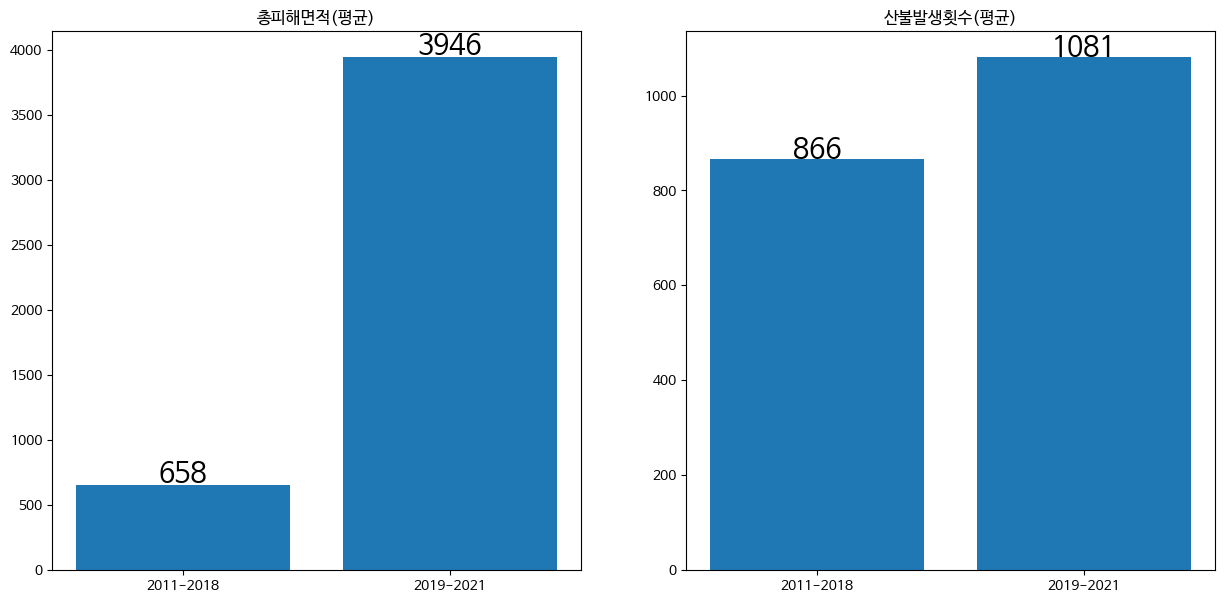

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 7))

ax1.bar(damagearea_mean_df['연도'], damagearea_mean_df['총피해면적(평균)'])
ax1.set_title('총피해면적(평균)')

ax2.bar(firecause_mean_df['연도'], firecause_mean_df['산불발생횟수(평균)'])
ax2.set_title('산불발생횟수(평균)')

for p in ax1.patches: 
    ax1.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 30), 
       ha='center', va='center', fontsize=20, color='black', xytext=(0, 10), 
       textcoords='offset points') 
    
for p in ax2.patches: 
    ax2.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 30), 
       ha='center', va='center', fontsize=20, color='black', xytext=(0, 16), 
       textcoords='offset points') 

plt.show()

In [ ]:
# damagearea(전체 연도 합) - damagearea(2022년) = 나머지 연도 합
remain = year_sum.sum()-year_sum.iloc[11,]

In [ ]:
# damagearea(전체 연도 합) - damagearea(2022년) = 나머지 연도 합
# damagearea(2022년) - 나머지 연도 합 
year_sum.iloc[11,] - remain

damagearea    30622.71
dtype: float64

### 2011년 ~ 2023년 국내 산불 발생 횟수 & 총 피해 면적

## 범주형

In [ ]:
df.head()

,damagearea,endday,endmonth,endtime,endyear,firecause,locbunji,locdong,locgungu,locmenu,locsi,startday,startdayofweek,startmonth,starttime,startyear,eng_region
0,0.10,28,12,08:30:00,2011,입산자실화,산202-2,장전평,홍천,홍천,강원,28,수요일,12,03:20:00,2011,Gangwon-do
1,0.50,24,12,16:30:00,2011,쓰레기소각,산14-1,무계,청송,현서,경북,24,토요일,12,14:30:00,2011,Gyeongsangbuk-do
2,0.01,22,12,18:20:00,2011,입산자실화,산52,원,산청,시천,경남,22,목요일,12,17:15:00,2011,Gyeongsangnam-do
3,0.20,09,12,15:00:00,2011,기타,산27,용수,기장,정관,부산,09,금요일,12,14:11:00,2011,Busan
4,0.30,29,11,22:30:00,2011,담뱃불실화,산4-1,거포,옥천,청성,충북,29,화요일,11,20:10:00,2011,Chungcheongbuk-do


### countplot

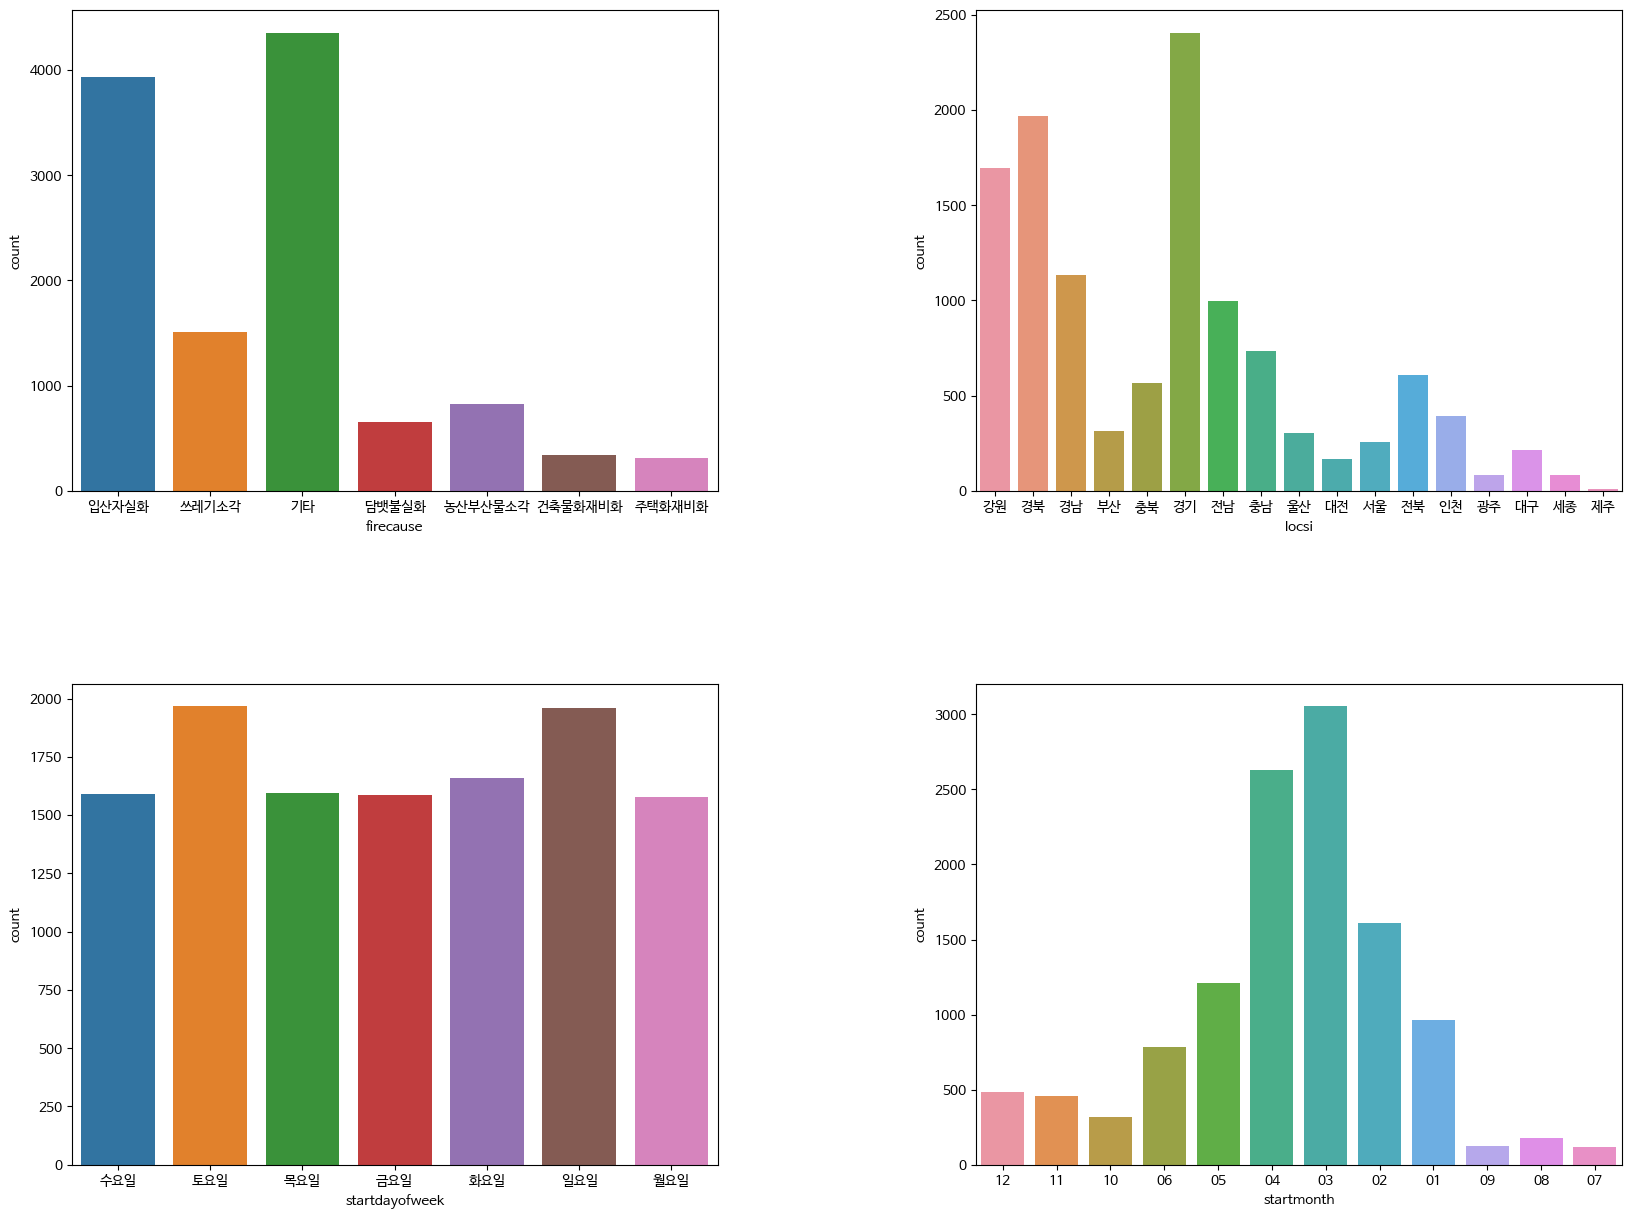

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
sns.countplot(x='firecause', data=df, ax=ax[0, 0])  
sns.countplot(x='locsi', data=df, ax=ax[0, 1])
sns.countplot(x='startdayofweek', data=df, ax=ax[1, 0])
sns.countplot(x='startmonth', data=df, ax=ax[1, 1])
fig.subplots_adjust(wspace=0.4, hspace=0.4)  # subplot간 간격 조정


### 시계열 분석

In [ ]:
import datetime

df['starttime'] = pd.to_datetime(df['starttime'], format='%H:%M:%S')
df['am_pm'] = df['starttime'].apply(lambda x: 'AM' if x.hour < 12 else 'PM')
df['hour'] = df['starttime'].dt.hour

<Axes: xlabel='count', ylabel='hour'>

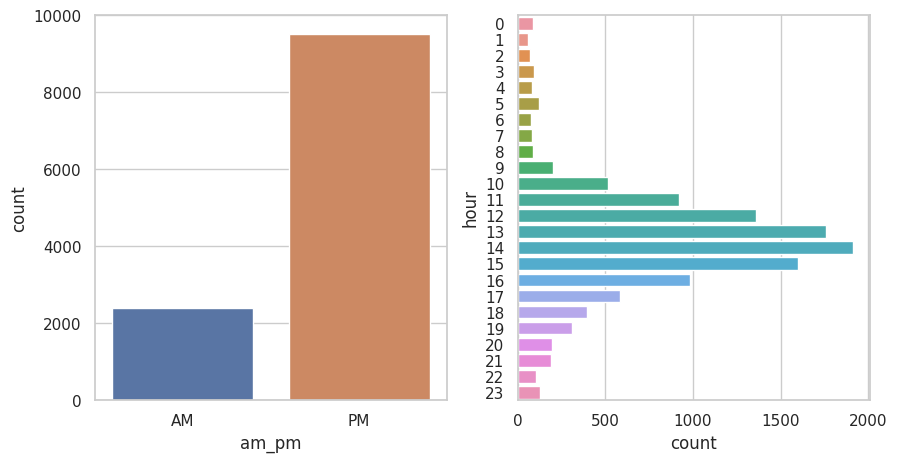

In [ ]:
import seaborn as sns

sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.countplot(x="am_pm", data=df, ax=axes[0])
sns.countplot(y="hour", data=df, ax=axes[1])


In [ ]:
df['starttime'] = pd.to_datetime(df['starttime'], format='%H:%M:%S')
df['endtime'] = pd.to_datetime(df['endtime'], format='%H:%M:%S')
df['duration'] = df['endtime'] - df['starttime']

<Axes: xlabel='duration_hours', ylabel='Count'>

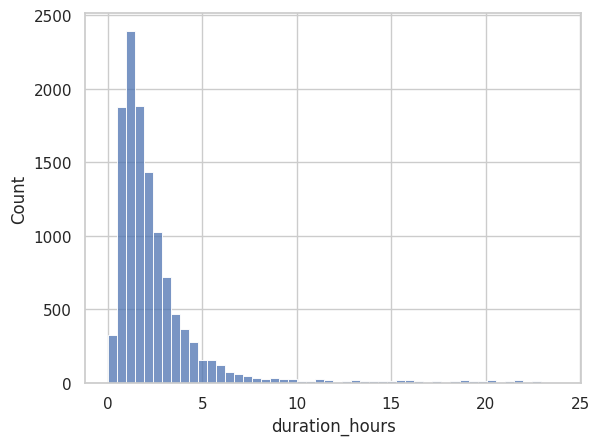

In [ ]:
df['duration_hours'] = df['duration'].apply(lambda x: x.seconds / 3600)
sns.histplot(data=df, x="duration_hours", bins=50)